# Hepatic Glucose Model

**König M., Bulik S. and Holzhütter HG.**  
*Quantifying the Contribution of the Liver to the Homeostasis of Plasma Glucose: A Detailed Kinetic Model of Hepatic Glucose Metabolism Integrated with the Hormonal Control by Insulin, Glucagon and Epinephrine*  
PLoS Comput Biol. 2012 Jun;8(6):e1002577.  
http://www.ncbi.nlm.nih.gov/pubmed/22761565

Glucose is an indispensable fuel for all cells and organs,
but at the same time leads to problems at high
concentrations. As a consequence, blood glucose is
controlled in a narrow range to guarantee constant supply
and on the other hand avoid damages associated with
elevated glucose levels. The liver is the main organ
controlling blood glucose by 

1. releasing newly synthesized or stored glucose in the blood stream when blood glucose is low 
2. using and storing glucose when blood glucose is elevated. 

These processes are regulated by hormones, in particular insulin, glucagon and epinephrine.

We developed the first detailed kinetic model of this
crucial metabolic system integrated with its hormonal
control and validated the model based on a multitude of
experimental data. Our model enables for the first time to
simulate hepatic glucose metabolism in depth. Our results
show how due to the hormonal control of key enzymes
the liver metabolism can be switched between glucose
production and utilization. We provide an essential model
to analyze glucose regulation in the normal state and
diseases associated with defects in glucose homeostasis
like diabetes.

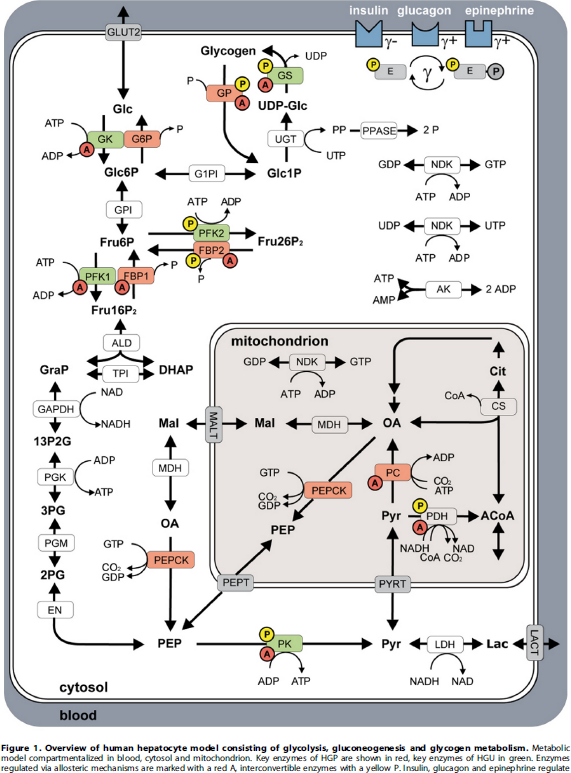

In [1]:
%matplotlib inline
from __future__ import print_function, division
# Model overview
from IPython.display import Image
Image(filename='Koenig2012_Figure_1.png', width=900) 

## Model loading

In [117]:
# model loading
import tellurium as te
r = te.loadSBMLModel('Koenig_glucose.xml')

# helper function for setting integrator settings
def set_settings(r):
    ''' 
    Sets all integrator settings in roadrunner.
    Necessary after every reload of models.
    '''
    # simulation settings
    absTol = 1E-6
    relTol = 1E-6
    # absTol relative to the amounts [fix for roadrunner issue #247]
    absTol = absTol * min(r.model.getCompartmentVolumes())  
    integrator = r.getIntegrator()
    integrator.setSetting('stiff', True)
    integrator.setSetting('absolute_tolerance', absTol)
    integrator.setSetting('relative_tolerance', relTol)
    integrator.setSetting('variable_step_size', True)

## Model report
Model is a classical ordinary differential equation model (ODE).

[HTML Report](Koenig2014_Hepatic_Glucose_Model_annotated.html)

In [118]:
print(r.getAntimony())

// Created by libAntimony v2.8.1
function maximum(x, y)
  piecewise(x, x > y, y);
end

function minimum(x, y)
  piecewise(x, x < y, y);
end


model *Koenig2014_Hepatic_Glucose_Model_annotated()

  // Compartments and Species:
  compartment extern, cyto, mito;
  species $atp in cyto, $adp in cyto, $amp in cyto, utp in cyto, udp in cyto;
  species gtp in cyto, gdp in cyto, $nad in cyto, $nadh in cyto, $phos in cyto;
  species pp in cyto, $co2 in cyto, $h2o in cyto, $h in cyto, glc1p in cyto;
  species udpglc in cyto, glyglc in cyto, glc in cyto, glc6p in cyto, fru6p in cyto;
  species fru16bp in cyto, fru26bp in cyto, grap in cyto, dhap in cyto, bpg13 in cyto;
  species pg3 in cyto, pg2 in cyto, pep in cyto, pyr in cyto, oaa in cyto;
  species lac in cyto, $glc_ext in extern, $lac_ext in extern, $co2_mito in mito;
  species $phos_mito in mito, oaa_mito in mito, pep_mito in mito, $acoa_mito in mito;
  species pyr_mito in mito, $cit_mito in mito, $atp_mito in mito, $adp_mito in mito;
  spe

## Hormone response curves
A crucial part of the model are the dose response curves for key hormones of glucose metabolism.

In [5]:
# phosphorylation state, glucagon, insulin, epi
def print_gamma_state(r):
    print('glucose = {}'.format(r.glc_ext))
    print('glucagon = {:.2f}'.format(r.glu))
    print('epinephrine = {:.2f}'.format(r.epi))
    print('insulin = {:.2f}'.format(r.ins))
    print('gamma = {:.2f}'.format(r.gamma))

print("--- Low glucose ---")
r.glc_ext = 3.0
print_gamma_state(r)
print('-' * 80)

print("--- High glucose ---")
r.glc_ext = 8.0
print_gamma_state(r)

--- Low glucose ---
glucose = 3.0
glucagon = 114.76
epinephrine = 3504.88
insulin = 9.71
gamma = 0.86
--------------------------------------------------------------------------------
--- High glucose ---
glucose = 8.0
glucagon = 38.19
epinephrine = 102.08
insulin = 347.74
gamma = 0.10


In [84]:
# phosphorylation state depending on glucose
import numpy as np
import roadrunner
from roadrunner import SelectionRecord

glc_vec = np.linspace(start=2.0, stop=20, num=100)
ins_vec = np.zeros_like(glc_vec)
glu_vec = np.zeros_like(glc_vec)
epi_vec = np.zeros_like(glc_vec)
gamma_vec = np.zeros_like(glc_vec)

# calculate the dose response curve
for k, glc in enumerate(glc_vec):
    r.glc_ext = glc
    # recalculate the global parameters, i.e. the rules for insulin, ...
    r.reset()
    # store values
    ins_vec[k] = r.ins
    glu_vec[k] = r.glu
    epi_vec[k] = r.epi
    gamma_vec[k] = r.gamma

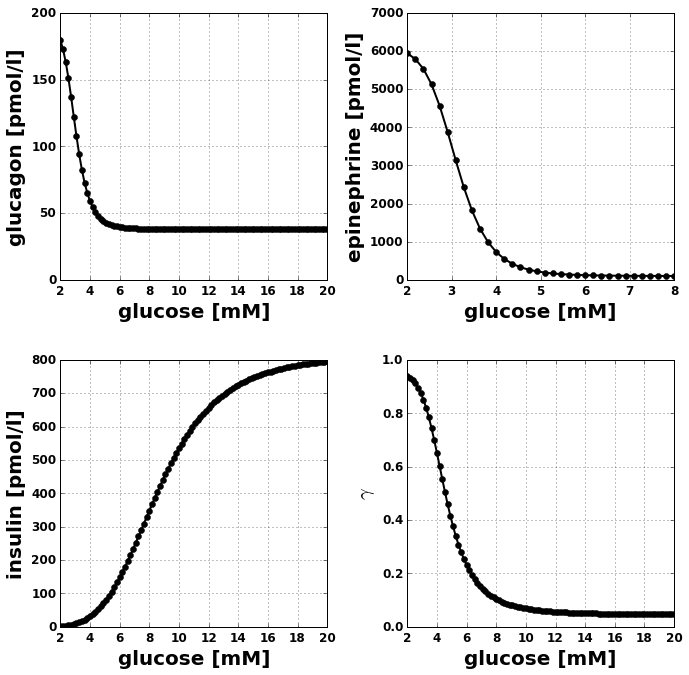

In [7]:
# plot the results
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams.update({'font.size': 12, 'font.weight': 'bold', 'axes.labelsize': 20, 'axes.labelweight': 'bold', 'axes.titlesize': 20, 'axes.titleweight': 'bold'})

# empty plot
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 11), dpi=80, 
                     facecolor='w', edgecolor='k')


(ax1, ax2, ax3, ax4) = (ax[0,0], ax[0,1], ax[1,0], ax[1,1])
for a in (ax1, ax2, ax3, ax4):
    a.set_xlabel('glucose [mM]')
    a.grid(True)

# general settings
kplotargs = {'color': 'black', 'linewidth': 2.0, 'marker': 'o', 'linestyle': 'solid'}
    
# Figure 1A
ax1.plot(glc_vec, glu_vec, **kplotargs)
ax1.set_ylabel('glucagon [pmol/l]')
ax1.set_xlim([2,20])
ax1.set_ylim([0,200])

# Figure 1B
ax2.plot(glc_vec, epi_vec, **kplotargs)
ax2.set_ylabel('epinephrine [pmol/l]')
ax2.set_xlim([2,8])
ax2.set_ylim([0,7000])

# Figure 1C
ax3.plot(glc_vec, ins_vec, **kplotargs)
ax3.set_ylabel('insulin [pmol/l]')
ax3.set_xlim([2,20])
ax3.set_ylim([0,800])

# Figure 1D
ax4.plot(glc_vec, gamma_vec, **kplotargs)
ax4.set_ylabel('$\gamma$')
ax4.set_xlim([2,20])
ax4.set_ylim([0,1]);

f.subplots_adjust(wspace=0.3, hspace=0.3)

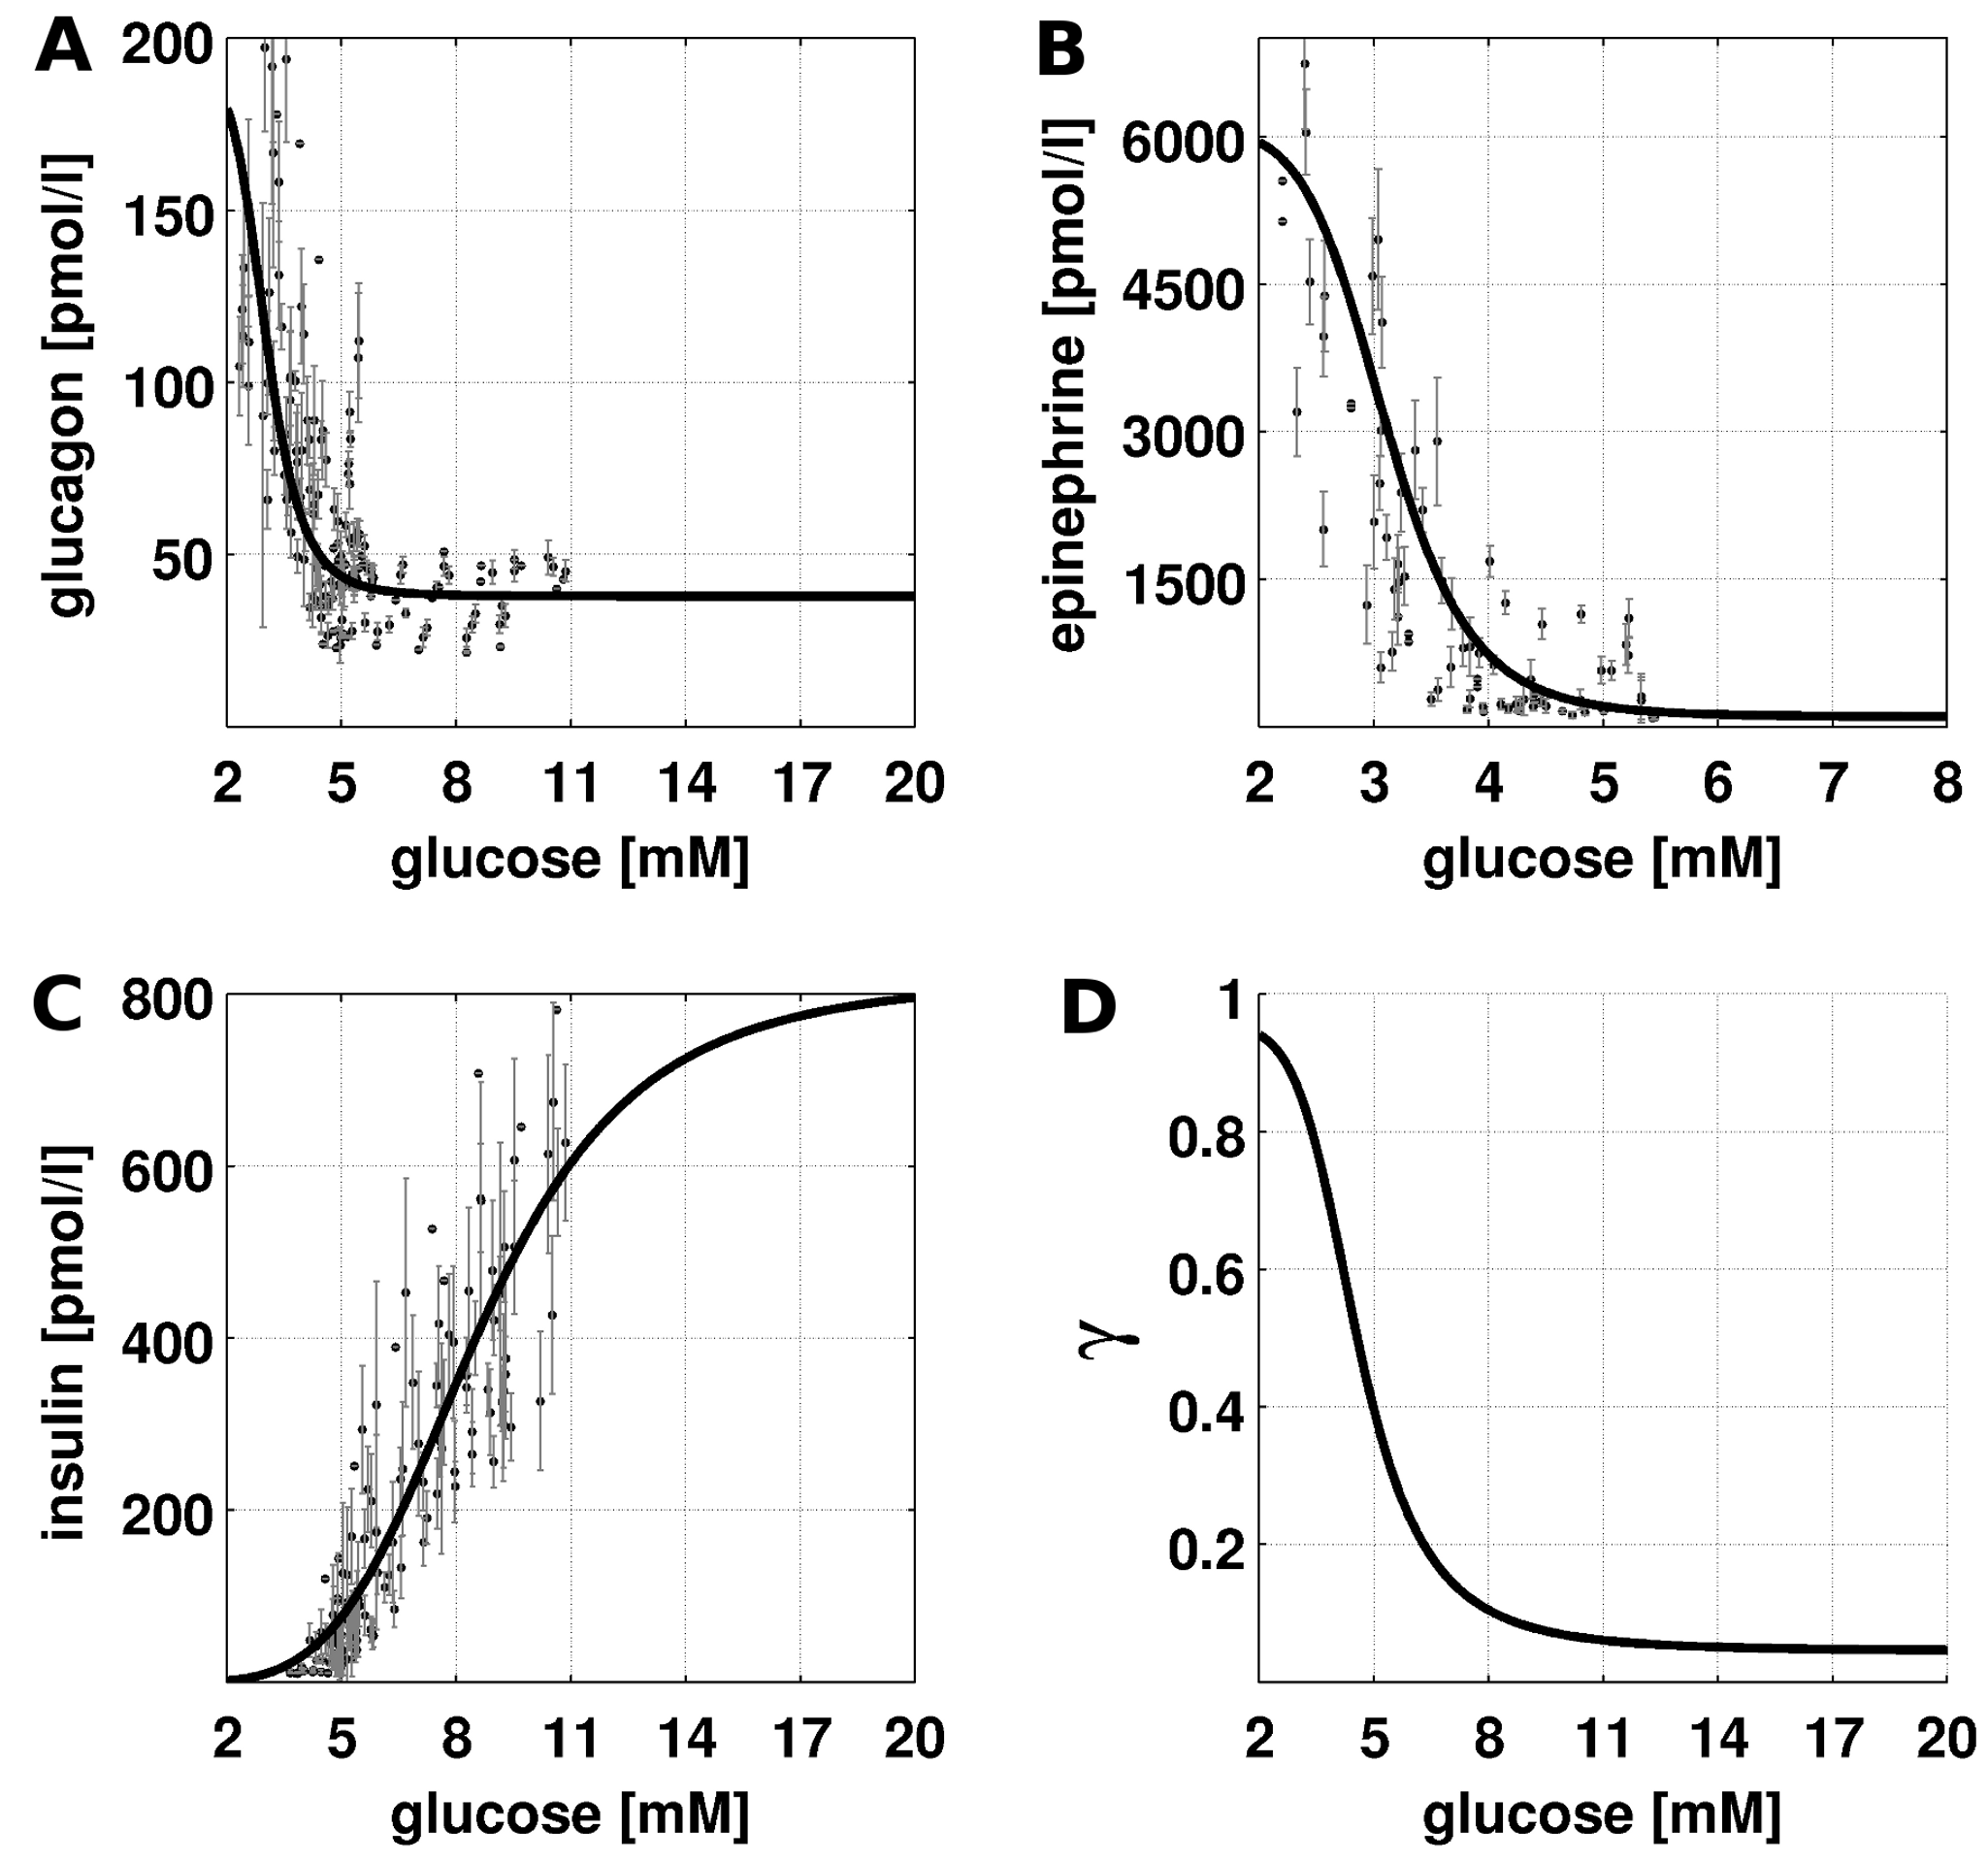

In [68]:
# and the Figure from the paper
from IPython.display import Image
Image(filename='Koenig2012_Figure_2.png', width=700) 

## Hepatic glucose production (HGP), gluconeogenesis (GNG) and GLY
Hepatic glucose metabolism in short term fasting.

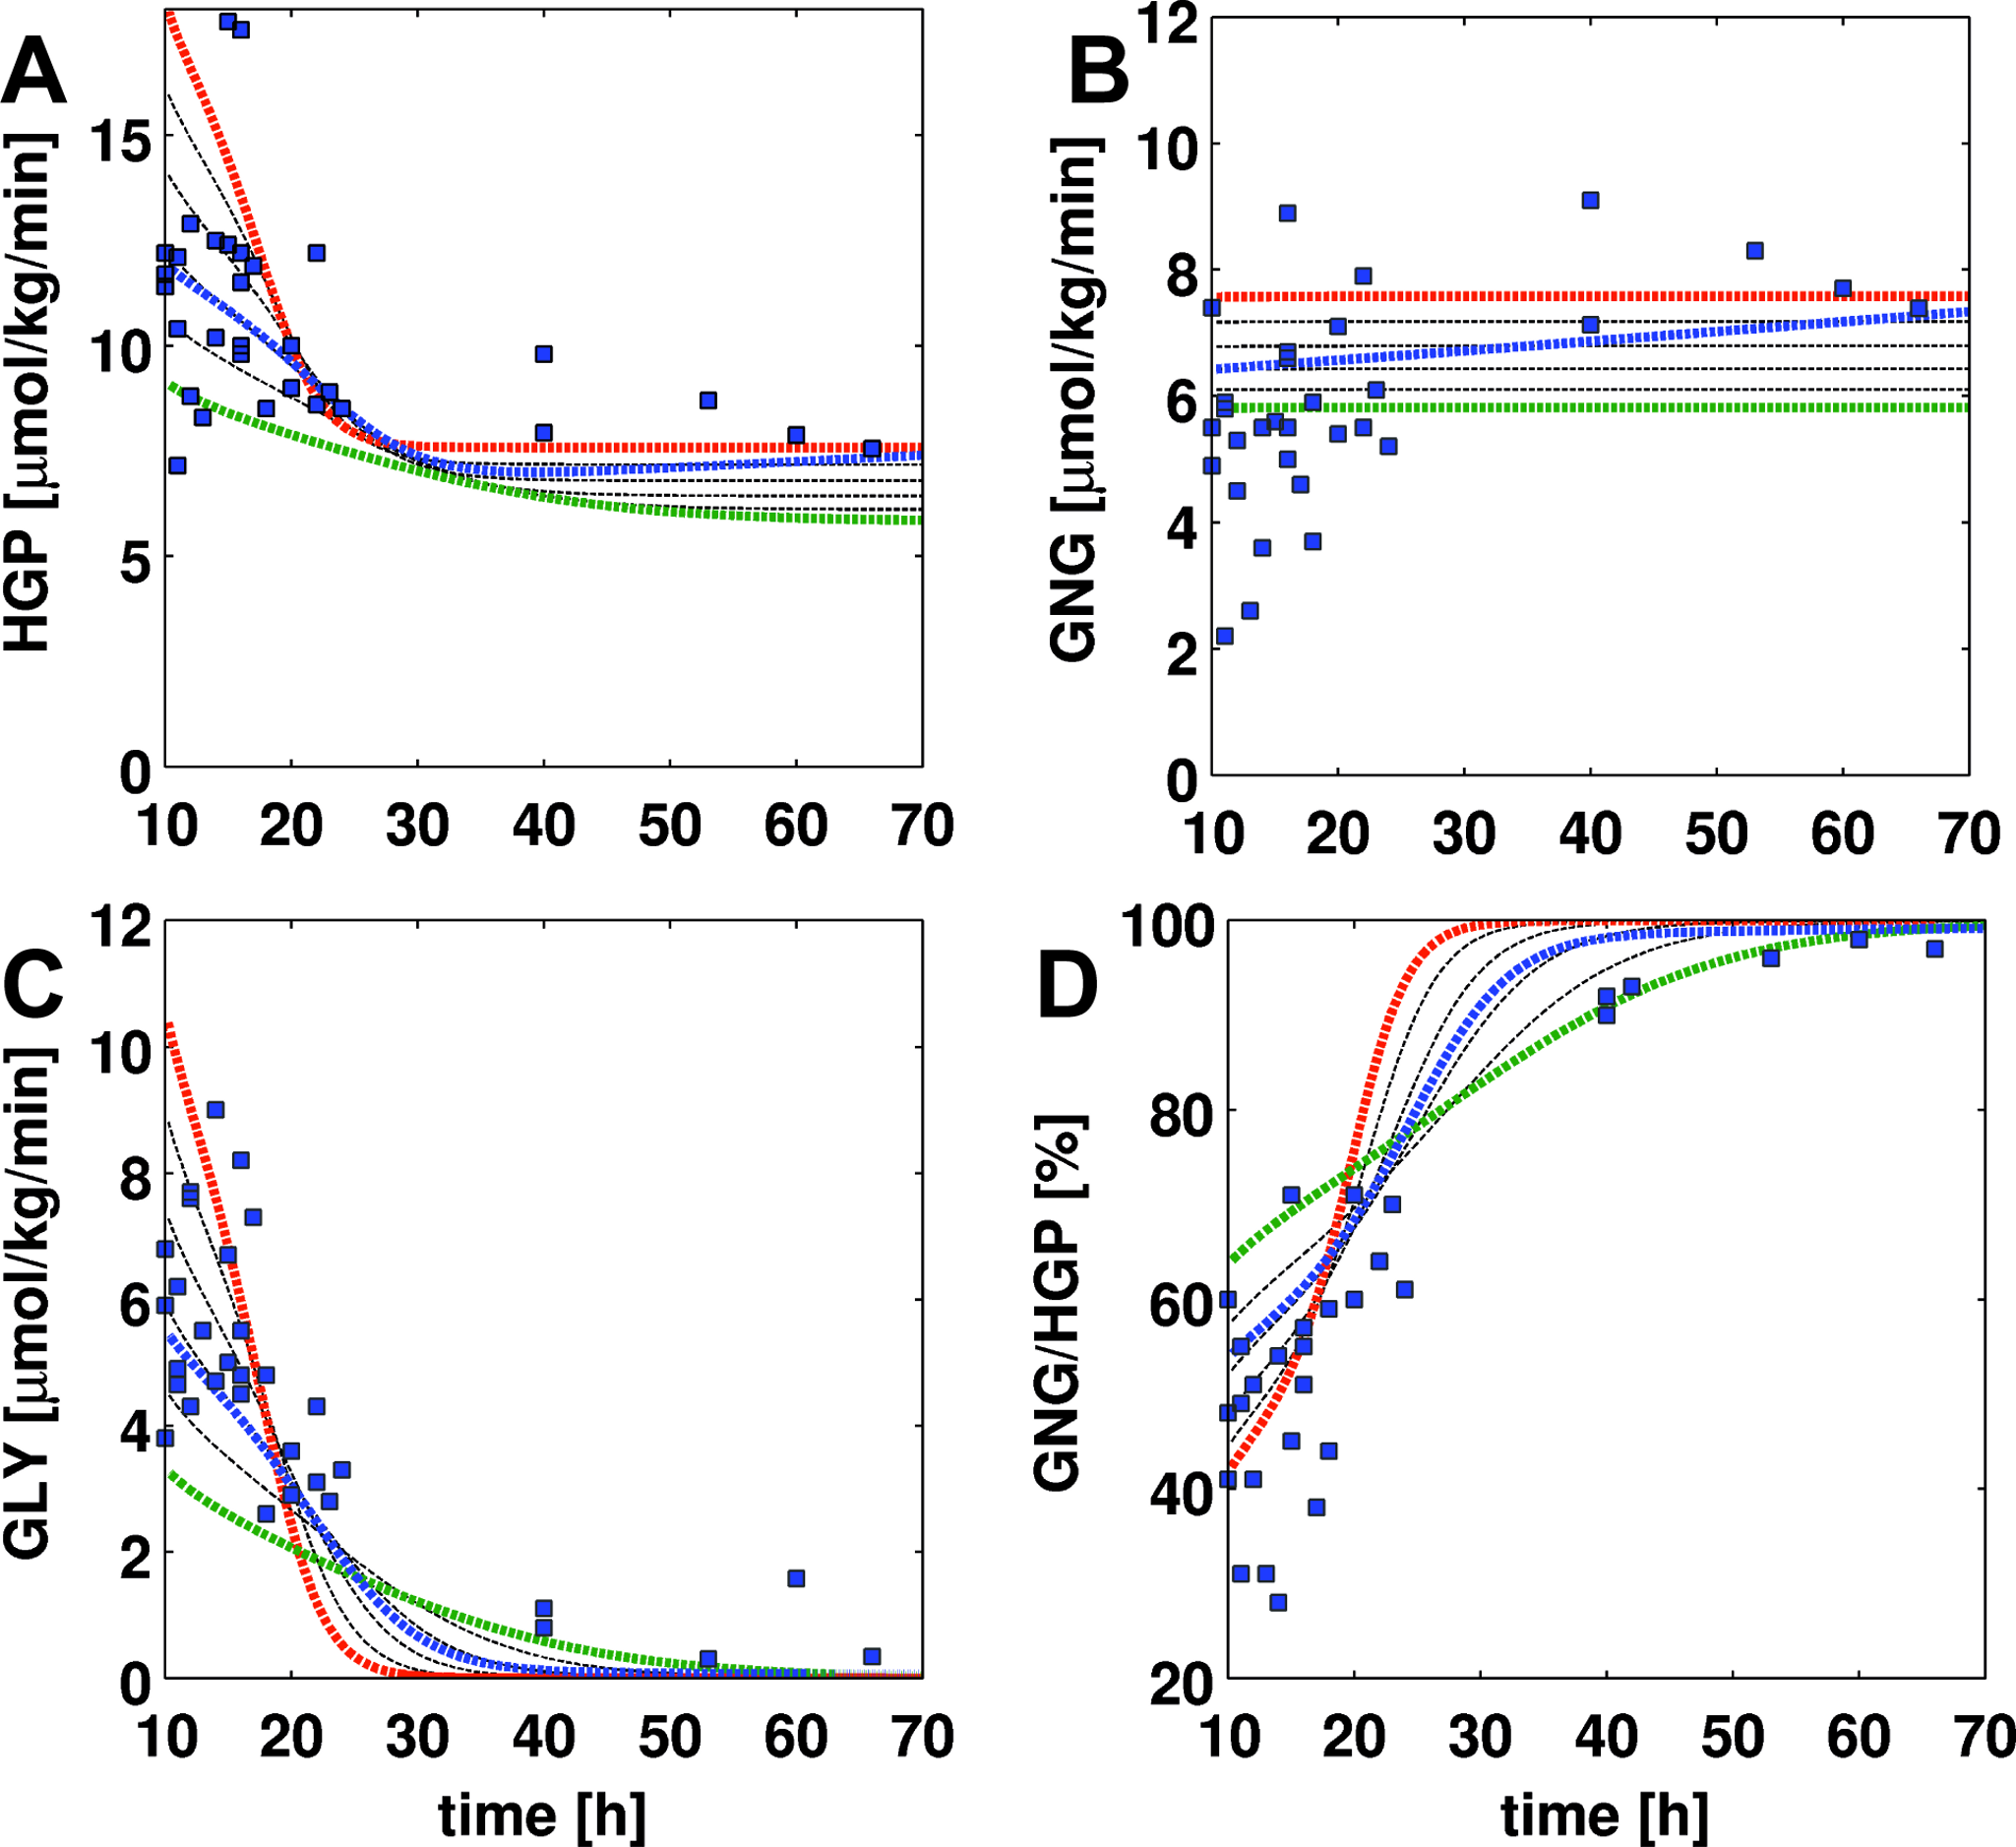

In [8]:
# and the Figure from the paper
from IPython.display import Image
Image(filename='Koenig2012_Figure_3.png', width=700) 

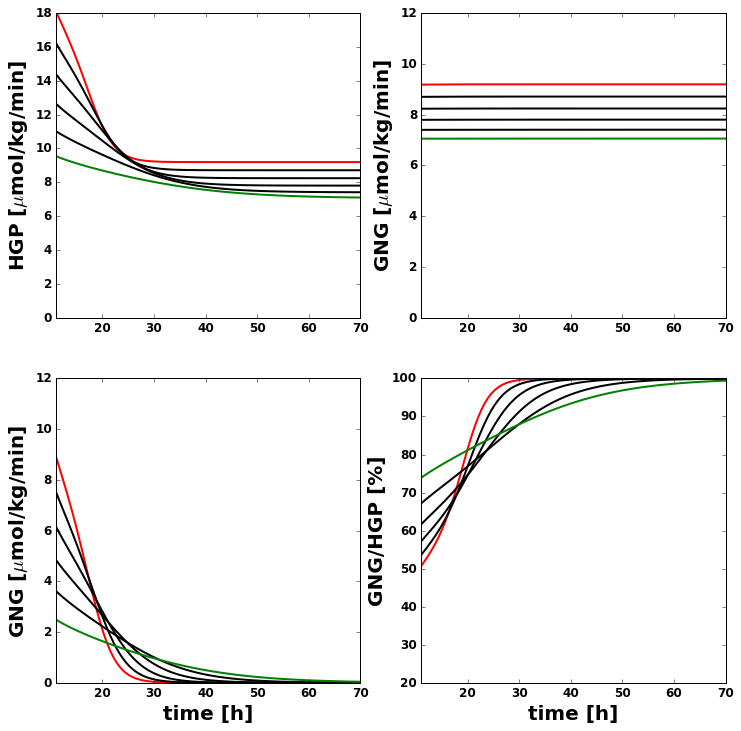

In [140]:
# TODO: handle the transient (i.e. steady state under 350mM glycogen)

# load clean model
del r
r = te.loadSBMLModel("Koenig_glucose.xml")
# integrator settings
set_settings(r)
r.integrator.setValue('variable_step_size', False)

# --------------------
# Simulate Figure 3
# --------------------
glc_vec = np.arange(3.6, 4.8, 0.2)
tstart = 10 * 3600
tend = 70 * 3600  # [s]
r.selections = ['time', 'HGP', 'GNG', 'GLY']

res = []
for glc in glc_vec:
    r.reset()
    r.glyglc = 350
    r.glc_ext = glc
    r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
    s = r.simulate(tstart, tend, 100)
    res.append(s)
    # r.plot(s, show=False, loc=None, xlim=[tstart+100, tend])
# plt.show()

# --------------------
# Figure 3
# --------------------
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), dpi=80, 
                     facecolor='w', edgecolor='k')

axes = (ax[0,0], ax[0,1], ax[1,0], ax[1,1])

for k, a in enumerate(axes):
    a.set_xlim([11, 70])
    if k>1:
        a.set_xlabel('time [h]')

for k, s in enumerate(res):
    time = s[:, 0]/3600
    if k==0:
        color='red'
    elif k==(len(res)-1):
        color='green'
    else:
        color='black'
    linewidth = 2.0
        
    # Figure 3A (HGP)
    axes[0].plot(time, -s[:,1], color=color, linewidth=linewidth)
    axes[0].set_ylabel('HGP [$\mu$mol/kg/min]')
    axes[0].set_ylim([0, 18])
    
    axes[1].plot(time, -s[:,2], color=color, linewidth=linewidth)
    axes[1].set_ylabel('GNG [$\mu$mol/kg/min]')
    axes[1].set_ylim([0, 12])

    axes[2].plot(time, -s[:,3], color=color, linewidth=linewidth)
    axes[2].set_ylabel('GNG [$\mu$mol/kg/min]')
    axes[2].set_ylim([0, 12])
    
    axes[3].plot(time, s[:,2]/s[:,1]*100, color=color, linewidth=linewidth)
    axes[3].set_ylabel('GNG/HGP [%]')
    axes[3].set_ylim([20, 100])

## Glycogenolysis and glycogen synthesis
Glycogenolysis and glycogen synthesis.

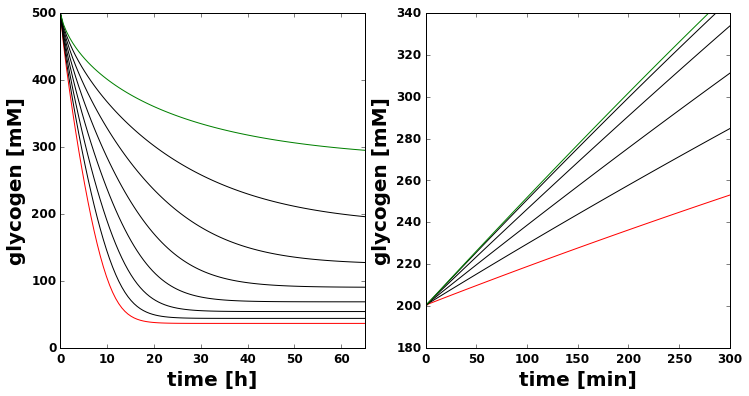

In [113]:
# load clean model
del r
r = te.loadSBMLModel("Koenig_glucose.xml")
# integrator settings
set_settings(r)
r.integrator.setValue('variable_step_size', False)

# --------------------
# Simulate Figure 4A
# --------------------
glc_vec_A = np.arange(3.6, 5.2, 0.2)
tend = 65 * 3600  # [s]
r.selections = ['time', '[glyglc]']

res_A = []
for glc in glc_vec_A:
    r.reset()
    r.glyglc = 500
    r.glc_ext = glc
    r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
    s = r.simulate(0, tend, 100)
    res_A.append(s)

# --------------------
# Simulate Figure 4B
# --------------------
glc_vec_B = np.arange(5.5, 8.5, 0.5)
tend = 300 * 60  # [s]
r.selections = ['time', '[glyglc]']
res_B = []
for glc in glc_vec_B:
    r.reset()
    r.glyglc = 200
    r.glc_ext = glc
    r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
    s = r.simulate(0, tend, 100)
    res_B.append(s)

# --------------------
# Figure 4
# --------------------
# empty plot
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=80, 
                     facecolor='w', edgecolor='k')

(ax1, ax2) = (ax[0], ax[1])
for k, s in enumerate(res_A):
    if k==0:
        color='red'
    elif k==(len(res_A)-1):
        color='green'
    else:
        color='black'
    ax1.plot(s[:,0]/3600, s[:,1], color=color)
    ax1.set_xlim([0, 65])
    ax1.set_xlabel('time [h]')
    ax1.set_ylabel('glycogen [mM]')

for k, s in enumerate(res_B):
    if k==0:
        color='red'
    elif k==(len(res_B)-1):
        color='green'
    else:
        color='black'
    ax2.plot(s[:,0]/60, s[:,1], color=color)
    ax2.set_xlim([0, 300])
    ax2.set_ylim([180, 340])
    ax2.set_xlabel('time [min]')
    ax2.set_ylabel('glycogen [mM]')

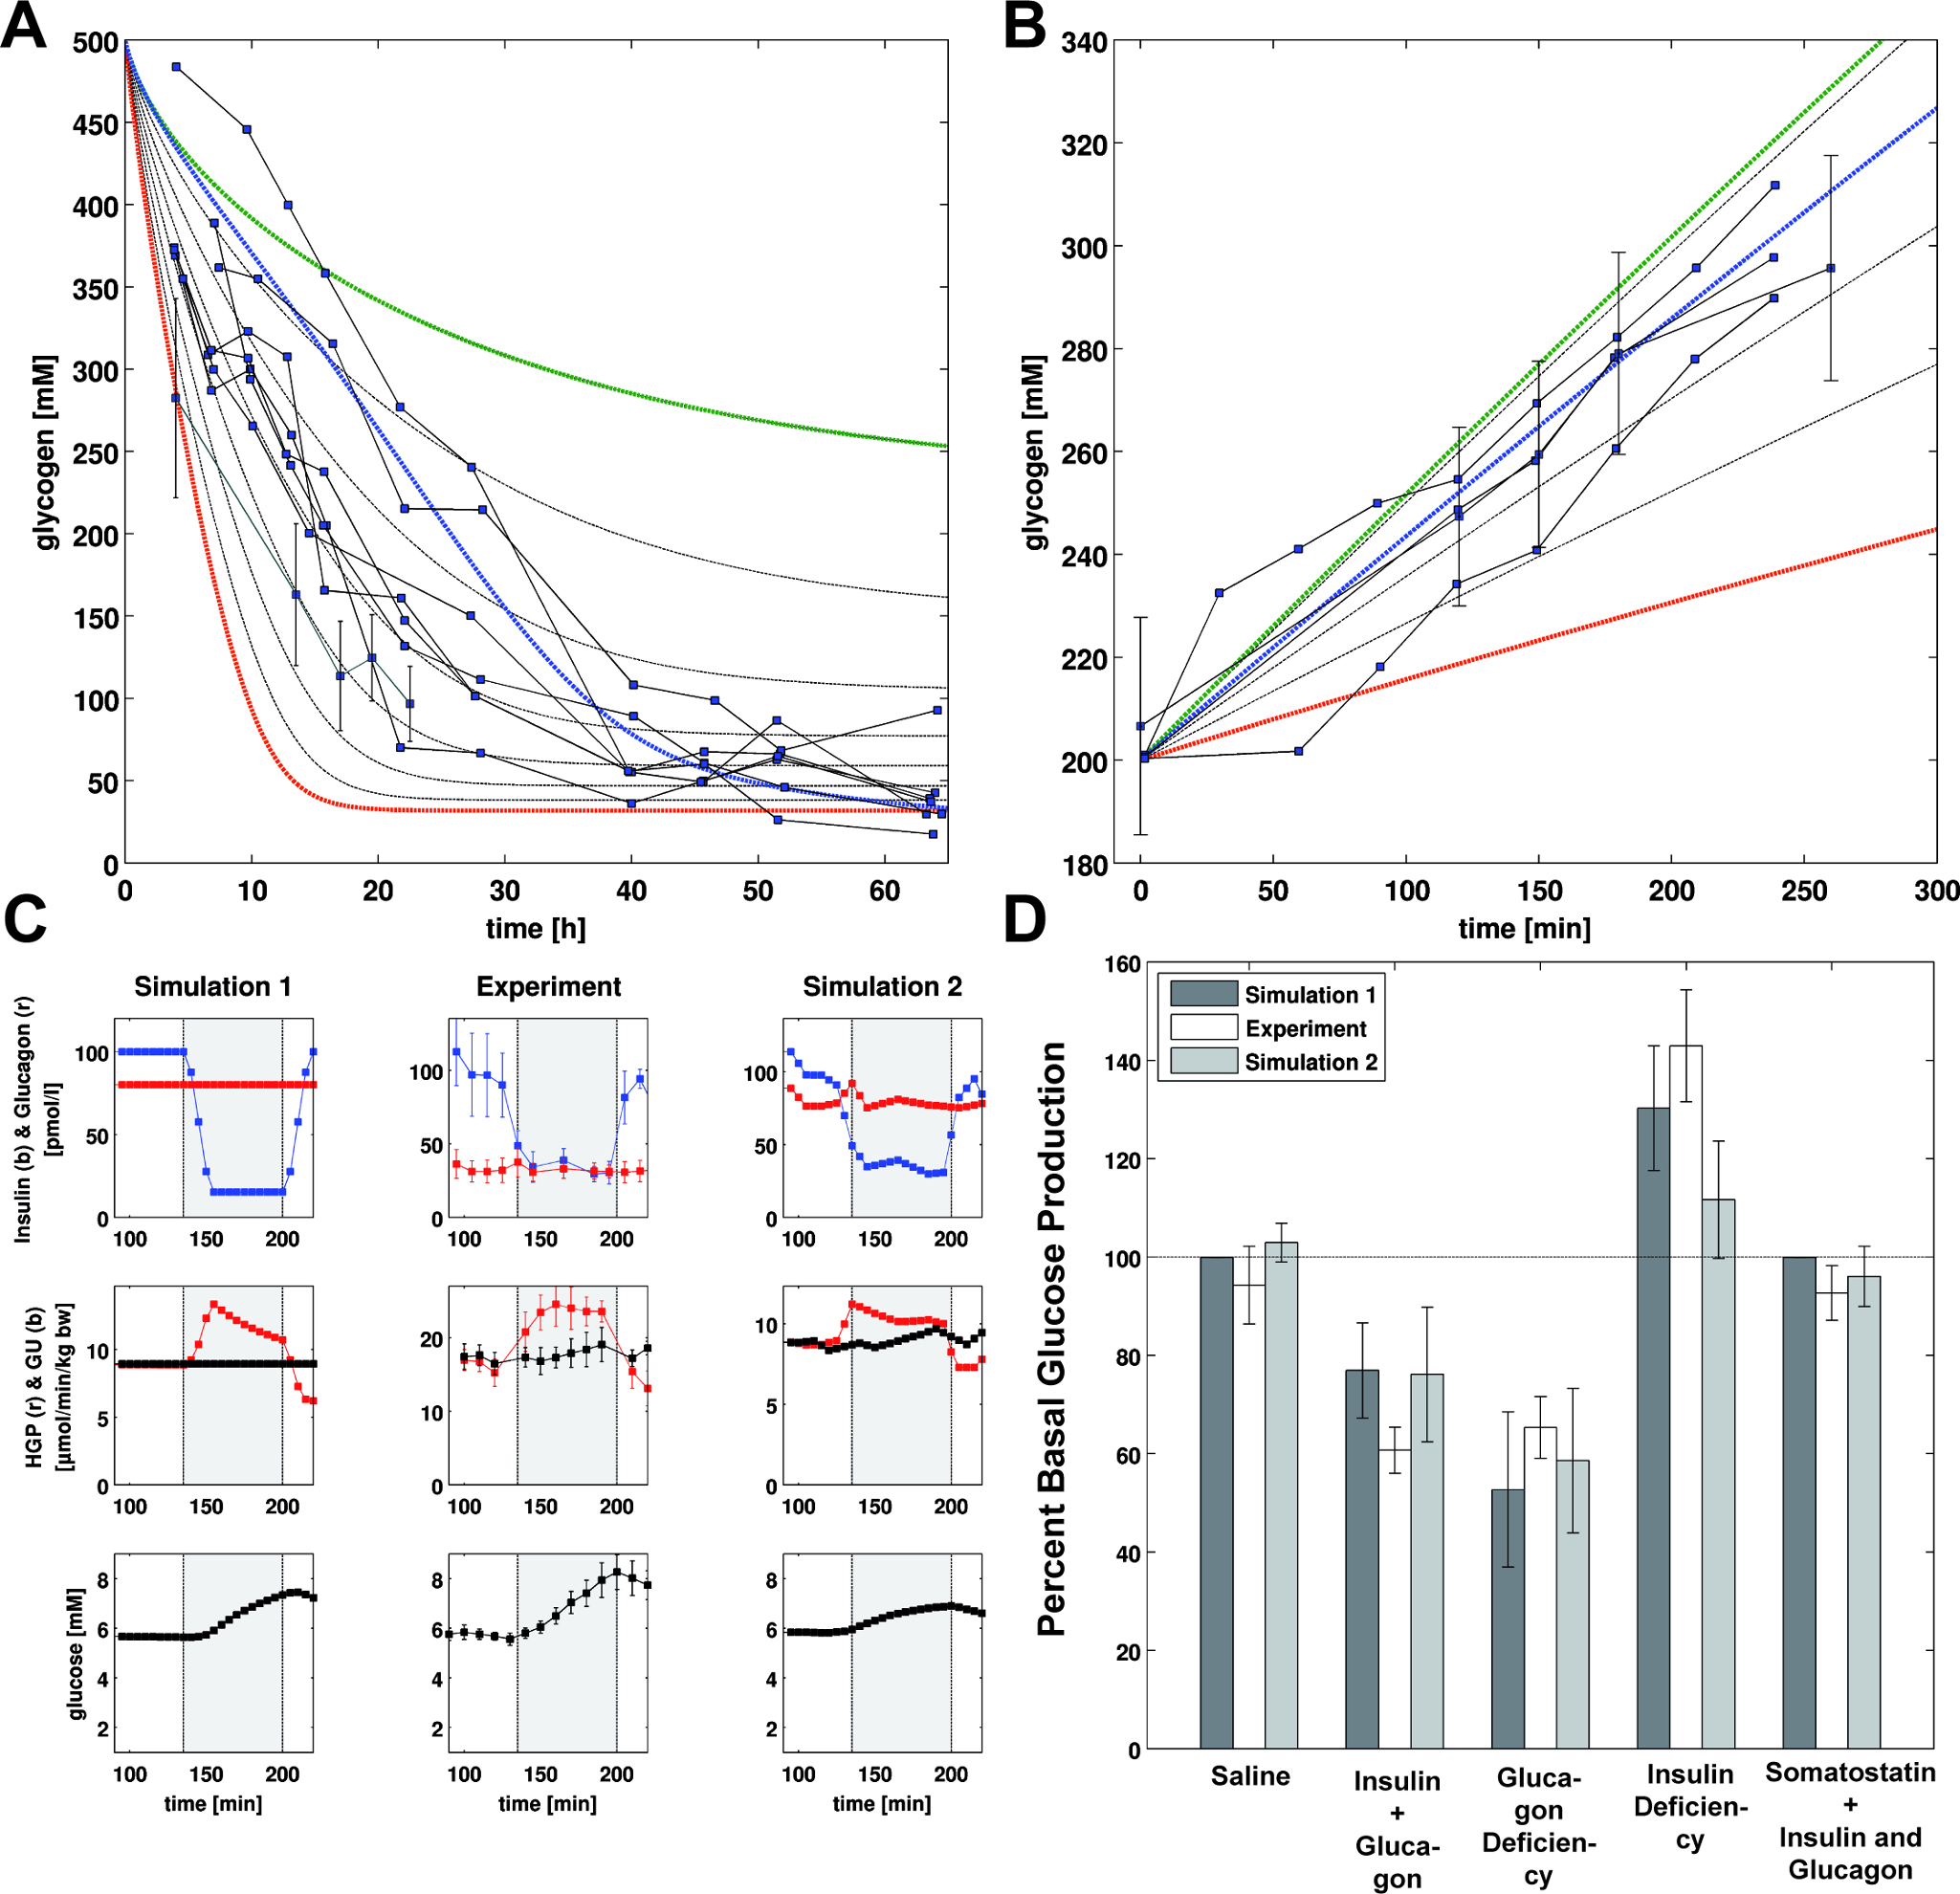

In [107]:
# and the Figure from the paper
from IPython.display import Image
Image(filename='Koenig2012_Figure_4.png', width=700)

## Switch between HGP and HGU

In [115]:
import libsbml
# ---------------------------------------
# SBML model modifications
# ---------------------------------------
# get model
doc = libsbml.readSBML("Koenig_glucose.xml")
model = doc.getModel()
print(model.getId())

# set boundary conditions, 
# i.e. glycogen and external glucose are vixed boundaryCondition=True
for sid in ['glyglc', 'glc_ext']:
    s = model.getSpecies(sid)
    s.setBoundaryCondition(True)

# now load the modfied sbml model
import tempfile
f_tmp = tempfile.NamedTemporaryFile(suffix='.xml')
sbml_str = libsbml.writeSBMLToFile(doc, f_tmp.name)
print(f_tmp.name)

del r  
r = te.loadSBMLModel(f_tmp.name)

# now simulate steady state under boundary conditions (not interested in the transient to steady state from initial values)
# r.reset()
# r.glc_ext = 3.0
# r.glyglc = 350
# r.simulate(0, 1E6)
# store values

# load the original model
# r

Koenig2014_Hepatic_Glucose_Model_annotated
/tmp/tmpXYODLf.xml


In [114]:
import roadrunner
from roadrunner import SelectionRecord
# ---------------------------------------
# Model simulations
# ---------------------------------------
# set integrator settings
set_settings(r)

# select the values of interest
r.selections = ['time', 'HGP', 'GNG', 'GLY']

# simulate
r.reset()
s1 = r.simulate(0, 1E6) # simulate long to steady state
# r.plot(s1, ylabel="Fluxes [$\mu$mol/kg/min]", ylim=[-30, 30], grid=True)

# HGP = -r.GLUT2  # hepatic glucose production/utilization corresponds to glucose exchange
# GNG = -r.GPI    # gluconeogenesis/glycolysis corresponds to flux through GPI
# GLY = r.G16PI   # conversion of glucose-6 phoshate to glucose-1 phoshphate (precursor of glycogen) 
HGP = r.HGP
GNG = r.GNG
GLY = r.GLY

print('GNG = {:.4f} [?]'.format(GNG))
print('GLY = {:.4f} [?]'.format(GLY))
print('HGP = {:.4f} [?]'.format(HGP))
# Hepatic glucose production is the sum of gluconeogenesis (GNG) and glycogenolysis (GLY)
print('GLY + GNG = {:.4f} [?]'.format(GNG+GLY))

# Are we in steady state ? Rate of change = N*v
print('\nMaximum change dxi/dt:')
print(np.max(np.abs(r.getRatesOfChange() )))

GNG = 3.2365 [?]
GLY = 0.0000 [?]
HGP = 3.2365 [?]
GLY + GNG = 3.2365 [?]

Maximum change dxi/dt:
1.16521375881e-14


### Parameter scan
Now we make the scan over the various combinations of constant external glucose `glc_ext` and glycogen storage `glyglc`.

In [39]:
import time

# vectors of parameters to vary
Nglc = 40
Nglyglc = 50
glc_vec = np.linspace(start=2, stop=14, num=Nglc)
glyglc_vec = np.linspace(start=0, stop=500, num=Nglyglc)

# empty matrices to store results
HGP = np.zeros(shape=[Nglc, Nglyglc])
GNG = np.zeros_like(HGP)
GLY = np.zeros_like(HGP)

# time the simulation
tstart = time.time()
# iterate over all combinations
for k, glc in enumerate(glc_vec):
    print('{:.2f}'.format( (k+1)/Nglc) )
    for i, glyglc in enumerate(glyglc_vec):
        # single simulation takes around ~0.02 - 0.03[s]
        
        # reset model to intial state
        r.resetAll()
        # set concentrations
        r.glc_ext = glc
        r.glyglc = glyglc
        # calculate dependent values
        r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
        
        # simulate
        # tstart = time.time()
        s1 = r.simulate(0, 1E6) # simulate long to steady state
        # print('Time<sim>: {:.3f}'.format(time.time()-tstart))
        
        # store results
        HGP[k, i] = r.HGP
        GNG[k, i] = r.GNG
        GLY[k, i] = r.GLY
        
print('Time<sim>: {:.3f}'.format(time.time()-tstart))

# transpose for plotting and analysis
HGP = np.transpose(HGP)
GNG = np.transpose(GNG)
GLY = np.transpose(GLY)

0.03
0.05
0.07
0.10
0.12
0.15
0.17
0.20
0.23
0.25
0.28
0.30
0.33
0.35
0.38
0.40
0.42
0.45
0.47
0.50
0.53
0.55
0.57
0.60
0.62
0.65
0.68
0.70
0.72
0.75
0.78
0.80
0.82
0.85
0.88
0.90
0.93
0.95
0.97
1.00
Time<sim>: 47.735


### Hepatic glucose response coefficient

In [63]:
# mid glucose vector
mglc_vec = (glc_vec[0:-1] + glc_vec[1:])/2
Nmglc = len(mglc_vec)

# HGRC = Delta HGP/ Delta glc
HGRC = np.zeros(shape=[Nmglc, Nglyglc])
for k, glc in enumerate(mglc_vec):
    for i, glyglc in enumerate(glyglc_vec):
        HGRC[k, i] = (HGP[i,(k+1)] - HGP[i, k]) / (glc_vec[k+1] - glc_vec[k]) 

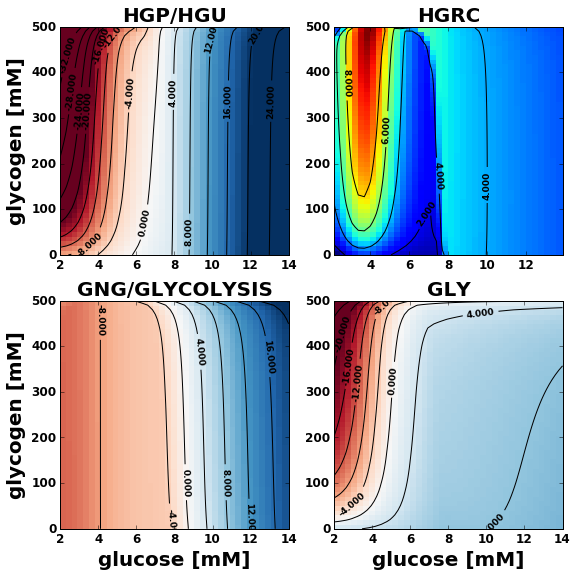

In [67]:
# Creat Figure 5

# empty plot
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 9), dpi=80, 
                     facecolor='w', edgecolor='k')

(ax1, ax2, ax3, ax4) = (ax[0,0], ax[0,1], ax[1,0], ax[1,1])
for k, a in enumerate([ax1, ax2, ax3, ax4]):
    if (k==2) | (k==3):
        a.set_xlabel('glucose [mM]')
    if (k==0) | (k==2):
        a.set_ylabel('glycogen [mM]')

# general settings
kwargs = {'cmap': 'RdBu', 'vmin': -20.0, 'vmax':20.0}

# grids and levels
X, Y = np.meshgrid(glc_vec, glyglc_vec)
MX, MY = np.meshgrid(mglc_vec, glyglc_vec)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
levels = np.arange(-32, 32, 4)

# Figure 5A
ax1.pcolor(glc_vec, glyglc_vec, HGP, **kwargs)
ax1.set_title('HGP/HGU')
cs1 = ax1.contour(X, Y, HGP, levels, colors='k') 
ax1.clabel(cs1, fontsize=9, inline=1)

# Figure 5B
ax2.pcolor(mglc_vec, glyglc_vec, np.transpose(HGRC))
ax2.set_title('HGRC')
cs2 = ax2.contour(MX, MY, np.transpose(HGRC), np.arange(0,10,2), colors='k') 
ax2.clabel(cs2, fontsize=9, inline=1)

# Figure 5C
ax3.pcolor(glc_vec, glyglc_vec, GNG, **kwargs)
ax3.set_title('GNG/GLYCOLYSIS')
cs2 = ax3.contour(X, Y, GNG, levels, colors='k') 
ax3.clabel(cs2, fontsize=9, inline=1)

# Figure 5D
ax4.pcolor(glc_vec, glyglc_vec, GLY, **kwargs)
ax4.set_title('GLY');
cs4 = ax4.contour(X, Y, GLY, levels, colors='k') 
ax4.clabel(cs4, fontsize=9, inline=1);

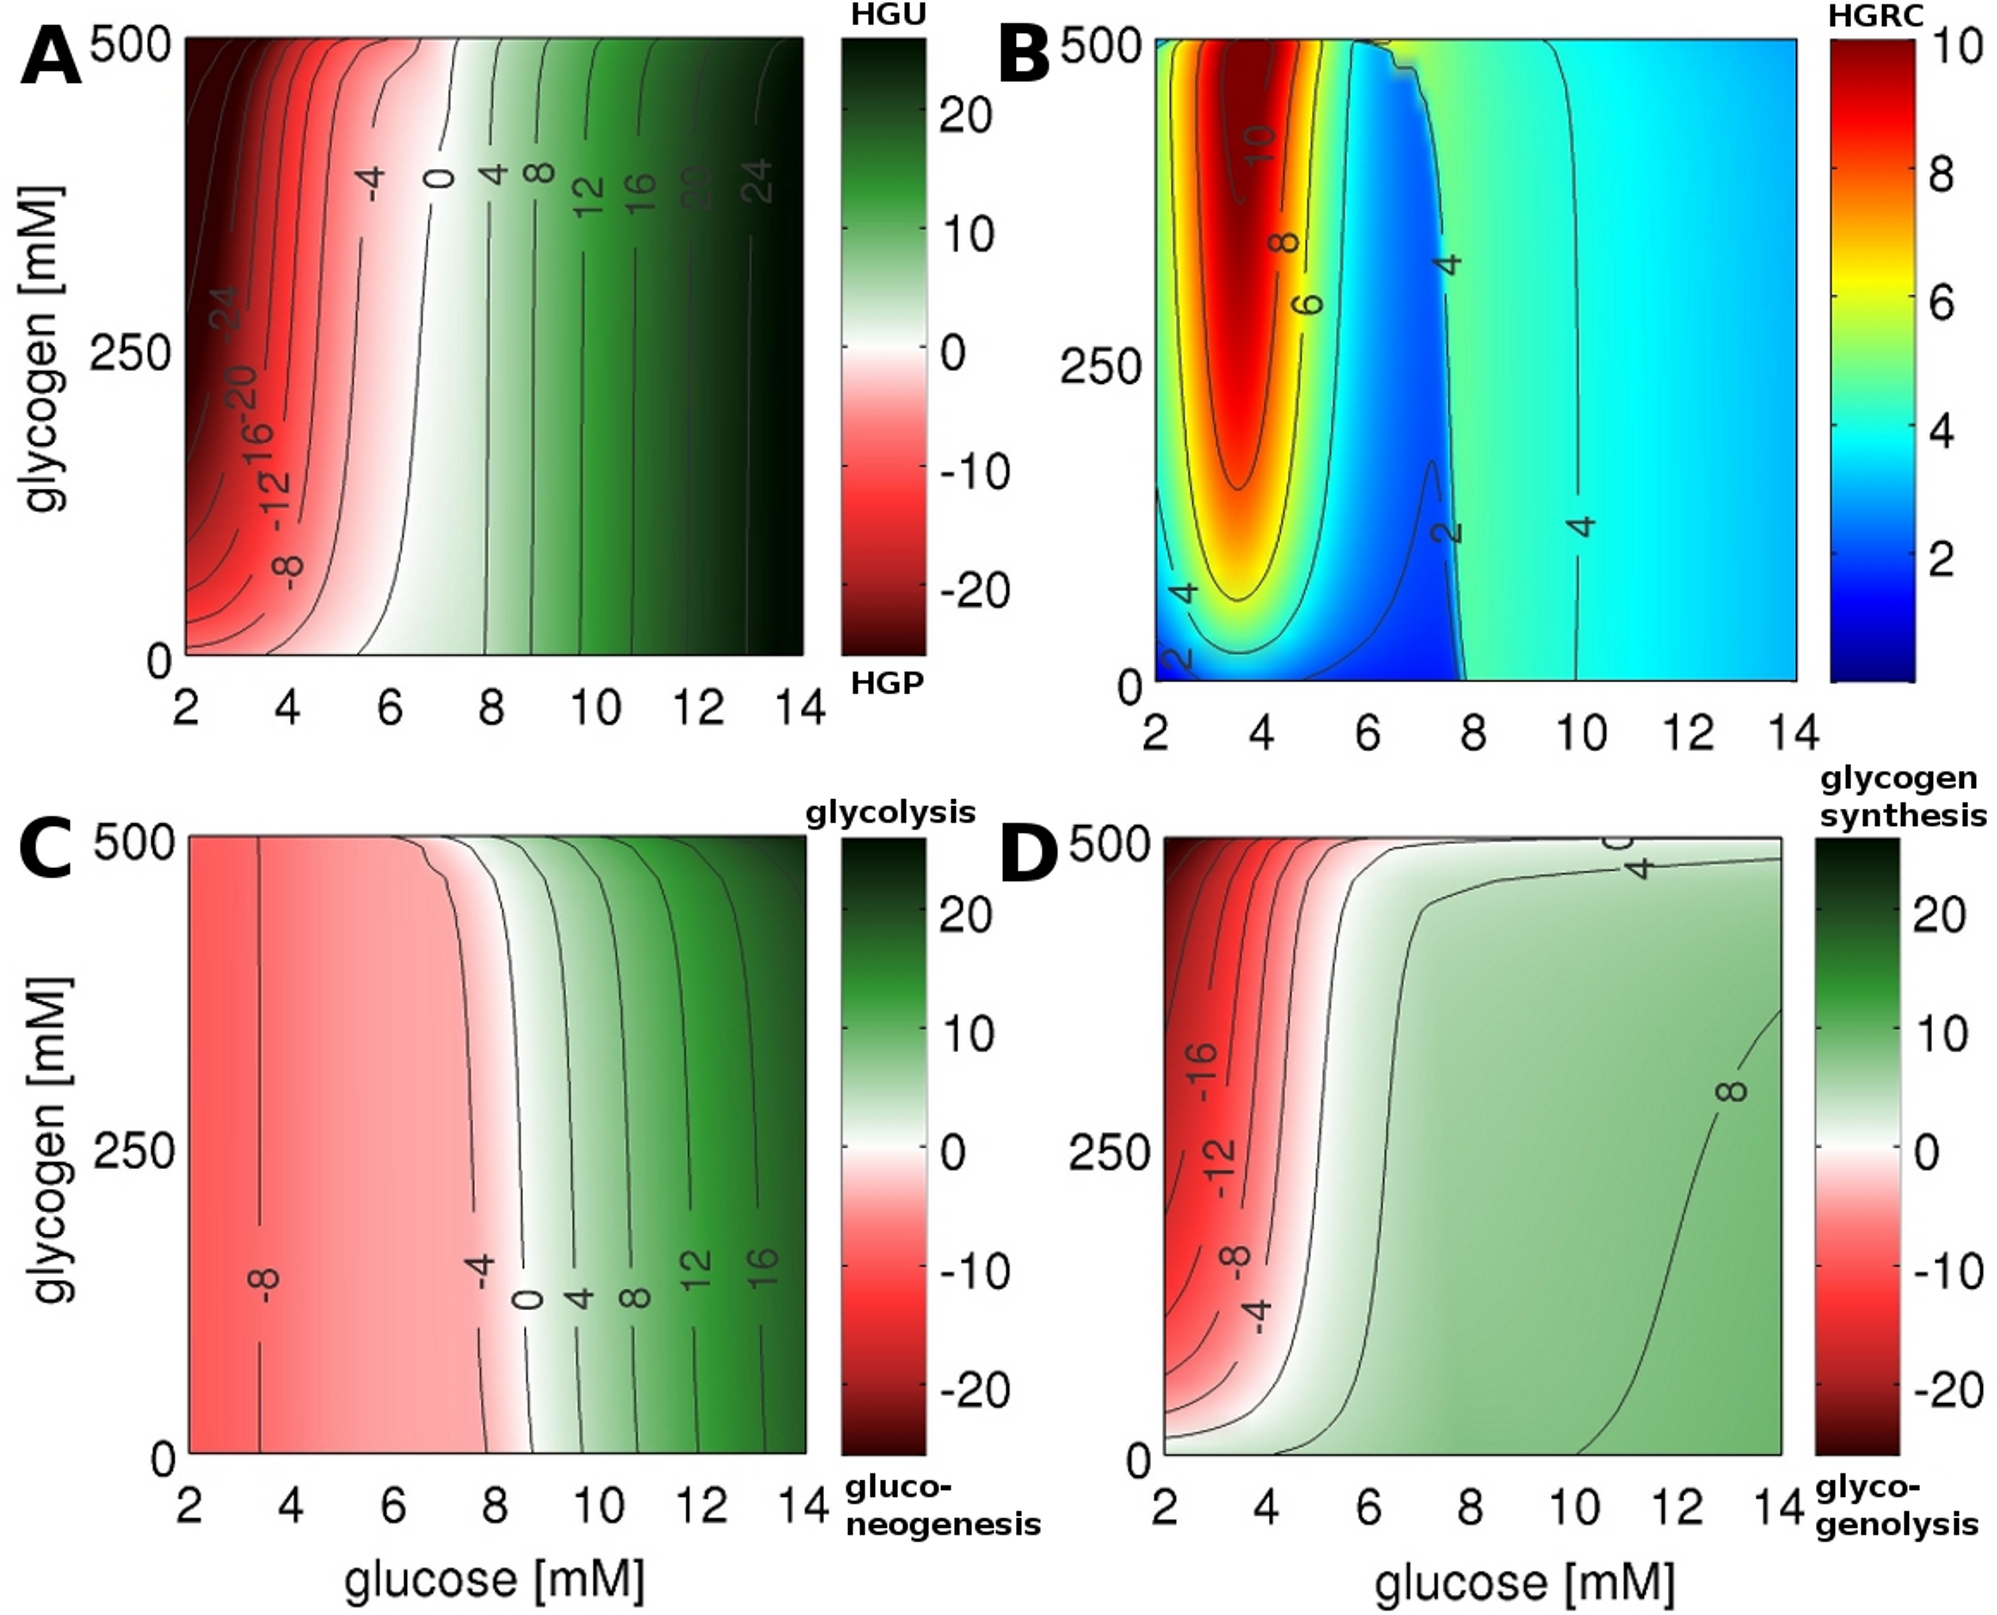

In [64]:
# and the Figure from the paper
from IPython.display import Image
Image(filename='Koenig2012_Figure_5.png', width=700) 